Loading pipeline data...

Columns in the dataset:
['Report Number', 'Supplemental Number', 'Accident Year', 'Accident Date/Time', 'Operator ID', 'Operator Name', 'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City', 'Accident County', 'Accident State', 'Accident Latitude', 'Accident Longitude', 'Cause Category', 'Cause Subcategory', 'Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries', 'Operator Contractor Injuries', 'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries', 'Operator Employee Fatalities', 'Operator Contractor Fatalities', 'Emergency Responder Fatalities', 'Other Fatalities', 'Public Fatalities', 'All Fatalities', 'Property Damage Costs', 'Lost Commodity

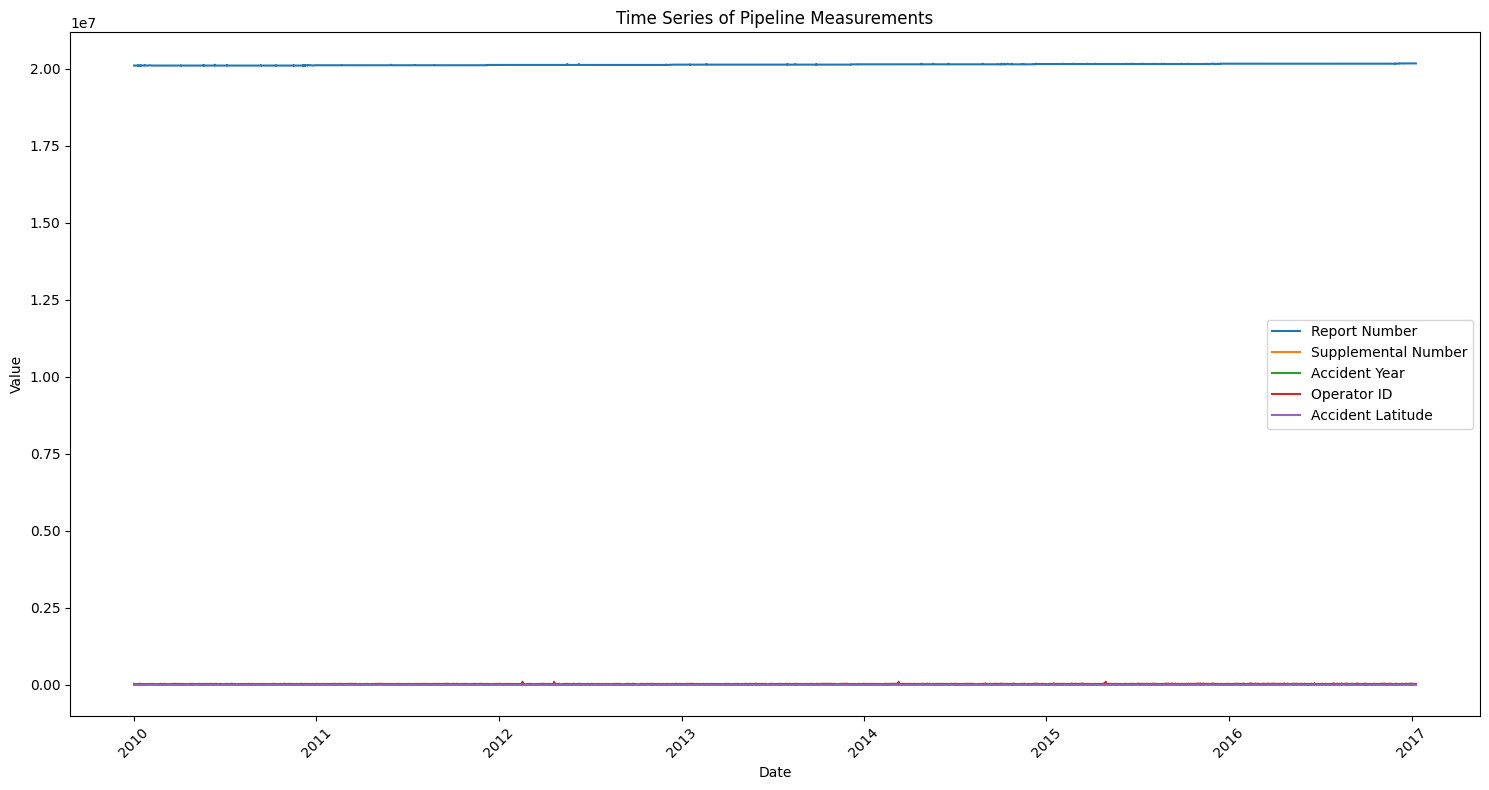

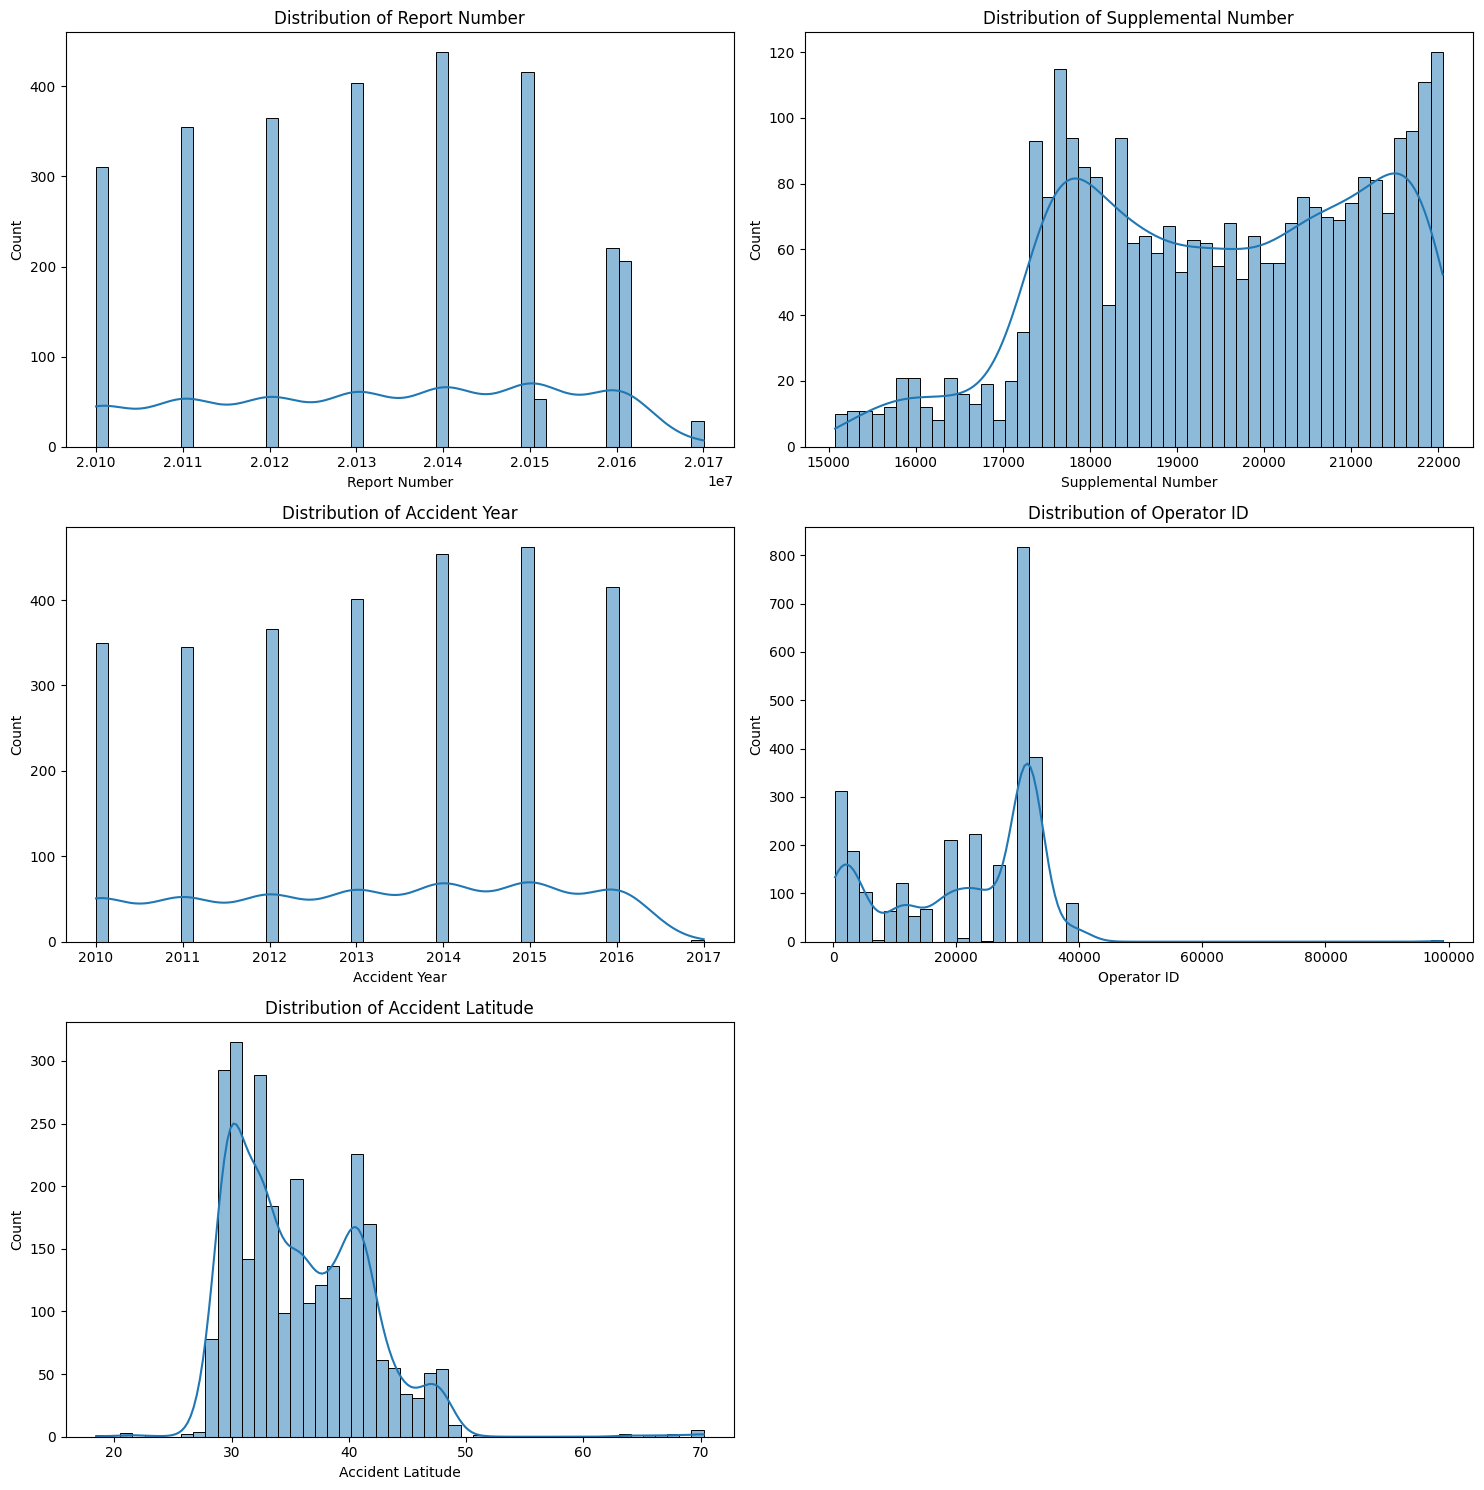


Processed data saved to: /var/home/kiddomendes/Documents/GitHub/VUT/Project/energy_theft_and_oil_leak/data/pipeline_data_processed.csv


In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Paths
DATA_DIR = Path.cwd().parent / 'data'
pipeline_path = DATA_DIR / 'pipelineLdata.csv'

# Load dataset without parse_dates first
print("Loading pipeline data...")
pipeline_df = pd.read_csv(pipeline_path)

# Display columns to check the actual date column name
print("\nColumns in the dataset:")
print(pipeline_df.columns.tolist())

# Convert the appropriate date column to datetime
# Assuming the date column might be named differently, update this line
# with the actual column name from your data
date_column = [col for col in pipeline_df.columns if 'time' in col.lower() or 'date' in col.lower()][0]
pipeline_df[date_column] = pd.to_datetime(pipeline_df[date_column])

# Basic information about the dataset
print("\nDataset Info:")
print(pipeline_df.info())

# Statistical summary
print("\nBasic statistics:")
print(pipeline_df.describe())

# Check for missing values
print("\nMissing values:")
print(pipeline_df.isnull().sum())

# Create time series plots
plt.figure(figsize=(15, 8))
numeric_cols = pipeline_df.select_dtypes(include=['float64', 'int64']).columns
sample_size = min(5, len(numeric_cols))
selected_cols = list(numeric_cols[:sample_size])

for col in selected_cols:
    plt.plot(pipeline_df[date_column], pipeline_df[col], label=col)

plt.title('Time Series of Pipeline Measurements')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution plots
plt.figure(figsize=(15, 5*((len(selected_cols)+1)//2)))
for i, col in enumerate(selected_cols, 1):
    plt.subplot((len(selected_cols)+1)//2, 2, i)
    sns.histplot(pipeline_df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Save the processed data
output_path = DATA_DIR / 'pipeline_data_processed.csv'
pipeline_df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to: {output_path}")